In [ ]:
#Import library and dependencies
import time
import math
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import sys
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import tensorflow.keras.backend as K
import pennylane as qml
from tensorflow.keras.metrics import Metric
from sklearn.model_selection import KFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
no_of_output_nodes = 1
df_1 = pd.read_excel('DSFdata.xlsx','Sheet1')
datafile_1 = df_1.values
print(datafile_1)
print(df_1.shape)
sheets = ['Sheet2', 'Sheet3','Sheet4', 'Sheet5', 'Sheet6', 'Sheet8', 'Sheet9']
# sheets_names = []
for sheet_name in sheets:
    print(sheet_name)
    df_sheet_name = pd.read_excel('DSFdata.xlsx', sheet_name)
    datafile_sheet_name = df_sheet_name.values
    #########    combining data from all sheets of excel file    #########
    datafile_1 = np.concatenate((datafile_1, datafile_sheet_name), axis=0)

print(datafile_1.shape)
########   just to see output variable values   ##########
out_var_datafile_1 = datafile_1[:,range(1,2)]              ## stored output_variable (4th column) from xlsx file
out_var_datafile_1 = out_var_datafile_1.reshape((-1,no_of_output_nodes))    ## one column with unknown no. of rows
print('no. of training points: ', len(out_var_datafile_1))

[[ 1.00000000e+00  1.70000000e+01  2.00000000e+00  2.60000000e+01
  -8.93514148e-01]
 [ 2.00000000e+00  1.70000000e+01  2.00000000e+00  2.60100000e+01
  -8.93357904e-01]
 [ 3.00000000e+00  1.70000000e+01  2.00000000e+00  2.60150000e+01
  -8.93204131e-01]
 ...
 [ 1.48910000e+04  1.70000000e+01  2.00000000e+00  2.60150000e+01
  -8.87039143e-01]
 [ 1.48920000e+04  1.70000000e+01  2.00000000e+00  2.60100000e+01
  -8.87267666e-01]
 [ 1.48930000e+04  1.70000000e+01  2.00000000e+00  2.60000000e+01
  -8.87505702e-01]]
(14893, 5)
Sheet2
Sheet3
Sheet4
Sheet5
Sheet6
Sheet8
Sheet9
(119144, 5)
no. of training points:  119144


In [ ]:
#Normalize/Pre-process the data using MinMax scalar transformation
scaler1 = MinMaxScaler()
scaler1.fit(datafile_1)
scaler_datafile_1 = scaler1.transform(datafile_1)

#Segregate data into Input variables X and output variables y
xtrain  =scaler_datafile_1[:,0:4]
ytrain = scaler_datafile_1[:,4:5]

#Convert data into dataframe
dataframe1 = pd.DataFrame(xtrain)
dataframe2 = pd.DataFrame(ytrain)
#Concatenate horizontally X and y variables for autoencoder training process
original = pd.concat([dataframe1, dataframe2], axis=1)

In [ ]:
#Architecture of Autoencoder model1
start_time = time.time()
input = Input(shape=(5,))
encoded = layers.Dense(64, activation='relu')(input)
encoded = layers.Dense(16, activation='relu')(encoded)
decoded = layers.Dense(16, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(5, activation='sigmoid')(decoded)
autoencoder=Model(input, decoded)
encoder = Model(input, encoded)

#Compile and look at the summary of autoencoder 1 model
opt = keras.optimizers.Adam(learning_rate=0.01)
autoencoder.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 64)                1088      
                                                                 
 dense_4 (Dense)             (None, 5)                 325       
                                                                 
Total params: 3109 (12.14 KB)
Trainable params: 3109 (12.14 K

In [ ]:
#Train the unsupervised autoencoder model with full data inclusive of input and output variables
history = autoencoder.fit(original,original, epochs=2, batch_size=256)
end_time = time.time()
print('end_time: ', end_time)
print('time taken to train in sec: ', (end_time - start_time))

Epoch 1/2
466/466 [==============================] - 5s 4ms/step - loss: 0.0200 - accuracy: 0.8490
Epoch 2/2
466/466 [==============================] - 2s 4ms/step - loss: 4.4688e-04 - accuracy: 0.9730
end_time:  1706623402.4239578
time taken to train in sec:  25.133506059646606


In [ ]:
#Augment the entire dataset for obtaining first batch of augmentation
augmented = autoencoder.predict(original)
Xaugtrain1000 = augmented[:,range(0,4)]
yaugtrain1000 = augmented[:,range(4,5)]

3724/3724 [==============================] - 6s 2ms/step


In [ ]:
#Architecture of Autoencoder model2 and train with full dataset
%matplotlib inline
input = Input(shape=(5,))
encoded = layers.Dense(128, activation='relu')(input)
encoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(5, activation='sigmoid')(decoded)
autoencoder1=Model(input, decoded)
encoder = Model(input, encoded)
opt = keras.optimizers.Adam(learning_rate=0.01)
autoencoder1.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
#autoencoder.summary()
#Augment the X_train dataset
history = autoencoder1.fit(original,original, epochs=2, batch_size=256)
end_time = time.time()
print('end_time: ', end_time)
print('time taken to train in sec: ', (end_time - start_time))

Epoch 1/2
466/466 [==============================] - 3s 3ms/step - loss: 0.0081 - accuracy: 0.8636
Epoch 2/2
466/466 [==============================] - 2s 4ms/step - loss: 2.1442e-04 - accuracy: 0.9138
end_time:  1706623417.5268552
time taken to train in sec:  40.236403465270996


In [ ]:
#Augment the entire dataset for obtaining second batch of augmentation
augmented1 = autoencoder1.predict(original)
Xaugtrain10001 = augmented1[:,range(0,4)]
yaugtrain10001 = augmented1[:,range(4,5)]

3724/3724 [==============================] - 7s 2ms/step


In [ ]:
#Concatenate original set of data along with first and second batch of augmented/generated data samples to extend the dataset
originalappended = np.concatenate([original, augmented, augmented1], axis=0)

In [ ]:
print(originalappended.shape)

(357432, 5)


In [ ]:
#After data augmenation, segregate the input X and output y variables
xtrain11  =originalappended[:,0:4]
ytrain11 = originalappended[:,4:5]

In [ ]:
#Apply downsampling process with factor D=100
from scipy import signal
ytrainsmall = signal.resample_poly(ytrain11, 100, 15000)
xtrainsmall = signal.resample_poly(xtrain11, 100, 15000)

In [ ]:
xtrainsmall.shape

(2383, 4)

In [ ]:
ytrainsmall.shape

(2383, 1)

In [ ]:
#Split data into Training and testing(inference with 2 trends of sensor data) set without shuffle
x_trainval = xtrainsmall[:1668]
y_trainval = ytrainsmall[:1668]
x_inference = xtrainsmall[1668:]
y_inference = ytrainsmall[1668:]

In [ ]:
#Build DQC (Dressed Quantum Circuit) based Quantum Regressor Model

In [ ]:
np.seterr(all='warn')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Define custom loss function for optimizing the QRM regerssor

In [ ]:
from tensorflow.keras import backend as K
def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


def custom_loss(y_true, y_pred):
    # Calculate L2 norms of y_true and y_pred
    l2_norm_true = np.linalg.norm(y_true, axis=-1)
    l2_norm_pred = np.linalg.norm(y_pred, axis=-1)
    # Calculate the element-wise product
    elementwise_product = l2_norm_true * l2_norm_pred
    # Calculate the negative sum
    lossl2 = -np.sum(elementwise_product)
    return lossl2

In [ ]:
#Define Quantum node to construct Dressed quantum Circuit for the QRM regerssor
import pennylane as qml
tf.keras.backend.set_floatx('float64')

n_qubits = 4
dev = qml.device("lightning.qubit", wires=n_qubits)#, shots = 1500)

@qml.qnode(dev, )
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits), rotation=qml.RY)
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

n_layers = 4
weight_shapes = {"weights": (n_layers, n_qubits)}

qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

In [ ]:
#Visualize the Quantum node
# Generate random inputs and weights for the QNode
inputs = np.random.rand(n_qubits)
weights_0 = np.random.rand(4, n_qubits)  # Assuming 3 layers, 1 parameter per layer

# Visualize the quantum circuit using Matplotlib
qml.drawer.use_style('pennylane')
fig, ax = qml.draw_mpl(qnode, expansion_strategy="device")(inputs, weights_0)
# Show the plot
plt.show()


In [ ]:
# Define the neural network model
def create_model():
    clayer_1 = tf.keras.layers.Dense(4)
    clayer_10 = tf.keras.layers.Dense(100, activation="relu")
    clayer_11 = tf.keras.layers.Dense(100, activation="relu")
    clayer_12 = tf.keras.layers.Dense(100, activation="relu")
    clayer_2 = tf.keras.layers.Dense(1)
    model = tf.keras.models.Sequential([clayer_1, qlayer, clayer_10, clayer_11, clayer_12, clayer_2])
    adam = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mean_squared_error', optimizer=adam,metrics=[custom_loss,'mae',r_square])
    return model

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results for each fold
mse_scores_per_fold = []

# Perform k-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(x_trainval), 1):
    X_train, X_test = x_trainval[train_index], x_trainval[test_index]
    y_train, y_test = y_trainval[train_index], y_trainval[test_index]

    # Create the neural network model
    model = create_model()

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split = 0.3, verbose=2)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Store MSE score for the current fold
    mse_scores_per_fold.append(mse)

    # Print MSE for the current fold
    print("Fold {}: MSE = {:.4f}".format(fold, mse))

# Plot a boxplot for each fold
plt.boxplot(mse_scores_per_fold)
plt.title('Boxplot of MSE Scores for Each Fold in K-Fold Cross Validation')
plt.xlabel('Folds')
plt.ylabel('MSE')
plt.show()

# Print the mean and standard deviation of MSE scores across all folds
print("\nOverall Mean MSE: {:.4f}".format(np.mean(mse_scores_per_fold)))
print("Overall Standard Deviation of MSE: {:.4f}".format(np.std(mse_scores_per_fold)))

In [ ]:
# Plot a boxplot for each fold
plt.boxplot(mse_scores_per_fold)
plt.title('Boxplot of MSE Scores for Each Fold in K-Fold Cross Validation')
plt.xlabel('Folds')
plt.ylabel('MSE')
plt.show()

# Print the mean and standard deviation of MSE scores across all folds
print("\nOverall Mean MSE: {:.4f}".format(np.mean(mse_scores_per_fold)))
print("Overall Standard Deviation of MSE: {:.4f}".format(np.std(mse_scores_per_fold)))

In [ ]:
#Get the training history of the QRM model

history_dict = history.history
print(history.history.keys())

# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(history.history)
# or save to csv:
hist_csv_file = 'QRMBasic4Qubit4Layer1500Shotstrain.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

dict_keys(['loss', 'custom_loss', 'mae', 'r_square', 'val_loss', 'val_custom_loss', 'val_mae', 'val_r_square'])


In [ ]:
# summarize history for MSE Loss
from keras.optimizers import RMSprop
import pylab as plt
fig1 = plt.gcf()
plt.plot(history.history['loss'], linewidth=3)
plt.plot(history.history['val_loss'], linewidth=3)
plt.grid(True)
plt.ylabel('Metrics', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.legend(['Training'], loc='best', fontsize=12)
plt.show()

In [ ]:
# summarize history for MSE Loss
from keras.optimizers import RMSprop
import pylab as plt
fig1 = plt.gcf()
plt.plot(history.history['custom_loss'], linewidth=3)
plt.plot(history.history['val_custom_loss'], linewidth=3)
plt.grid(True)
plt.ylabel('Metrics', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.legend(['Training'], loc='best', fontsize=12)
plt.show()

In [ ]:
#Save the model in joblib format
from keras.models import load_model
#model.save(SAVE_PATH +"modelQReg5Qu100Shot2Qulaytrain.h5")
import joblib
filename = 'modelQReg5Qu500Shot3Qulaytrain.model'
joblib.dump(model, filename)
print("Saved model to disk")

Saved model to disk


In [ ]:
def create_model():
    layer_1 = tf.keras.layers.Dense(4)
    layer_2 = tf.keras.layers.Dense(100, activation="relu")
    layer_3 = tf.keras.layers.Dense(100, activation="relu")
    layer_4 = tf.keras.layers.Dense(1)

    model1 = tf.keras.Sequential([layer_1, layer_2,layer_3, layer_4])
    adam = tf.keras.optimizers.Adam(learning_rate=0.01)
    model1.compile(loss='mean_squared_error', optimizer=adam, metrics=[custom_loss,'mae',r_square])
    return model1

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results for each fold
mse_scores_per_fold = []

# Perform k-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(x_trainval), 1):
    X_train, X_test = x_trainval[train_index], x_trainval[test_index]
    y_train, y_test = y_trainval[train_index], y_trainval[test_index]

    # Create the neural network model
    model1 = create_model()

    # Train the model
    history1 = model1.fit(X_train, y_train, epochs=3, batch_size=128, validation_split = 0.3, verbose=2)

    # Make predictions on the test set
    y_pred = model1.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Store MSE score for the current fold
    mse_scores_per_fold.append(mse)

    # Print MSE for the current fold
    print("Fold {}: MSE = {:.4f}".format(fold, mse))

# Plot a boxplot for each fold
plt.boxplot(mse_scores_per_fold)
plt.title('Boxplot of MSE Scores for Each Fold in K-Fold Cross Validation')
plt.xlabel('Folds')
plt.ylabel('MSE')
plt.show()

# Print the mean and standard deviation of MSE scores across all folds
print("\nOverall Mean MSE: {:.4f}".format(np.mean(mse_scores_per_fold)))
print("Overall Standard Deviation of MSE: {:.4f}".format(np.std(mse_scores_per_fold)))

In [ ]:
#Predict one single trend of DSF sensor data from Test set
QRM= model.predict(x_test[25:100])
ANNPred = model1.predict(x_test[25:100])
#Denormalize the predicted values to plot it with original trend
y03 = scaler1.inverse_transform(QRM)
y04 = scaler1.inverse_transform(ANNPred[:])

3/3 [==============================] - 1s 485ms/step


In [ ]:
#Extract one single trend of original DSF sensor data from Test set
y01 = scaler1.inverse_transform(y_test[25:100])
#Extract time parameter of one single trend of original DSF sensor data from Test set
z01 = scaler1.inverse_transform(x_test[25:100])
z01.reshape(-1,4)
z01 = z01[:,0]

In [ ]:
#Plot the comparison plot
plt.figure()
plt.plot(z01,y01,color='red',linewidth=3)
plt.plot(z01,y03, color = 'blue',linewidth=3)
plt.plot(z01,y04, color = 'lime',linewidth=3)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Relative Power")
plt.legend(labels=["Actual", "Quantum Regressor Prediction"])
plt.tick_params(axis="both", which="major")
plt.tick_params(axis="both", which="minor")
plt.show()

In [ ]:
y01 = y_test

In [ ]:
ANNPred = model1.predict(x_test)
yy1 =ANNPred[:]

In [ ]:
QRMPred = model.predict(x_test)
y03 =QRMPred[:]

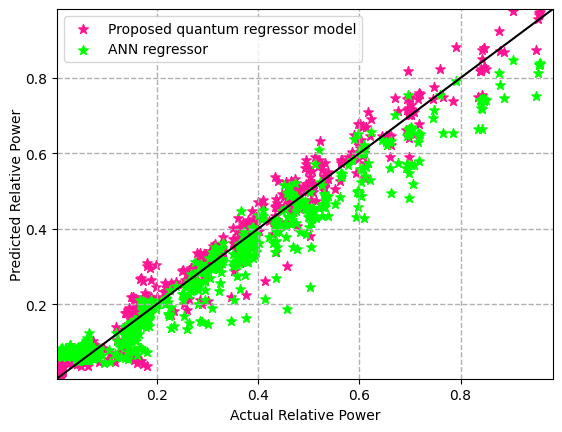

In [ ]:
#Plot the bubble plot
xx = y01
yy = y03
yy1 =ANNPred[:]

bubble_plot_line_x1y1 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
plt.xlim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.ylim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])

plt.plot(bubble_plot_line_x1y1, bubble_plot_line_x1y1, 'k-', linewidth=1.5)
plt.grid(linestyle='--', linewidth=1)
plt.scatter(xx, yy, label='Proposed quantum regressor model', marker='*', facecolors='', c='deeppink', s=50)
plt.scatter(xx, yy1, label='ANN regressor', marker='*', facecolors='', c='lime', s=50)
plt.legend(loc='best', fontsize=10)

plt.xlabel('Actual Relative Power', fontsize=10)
plt.ylabel('Predicted Relative Power', fontsize=10 ,labelpad=0.8)
plt.savefig('ActualPredictY1.png', dpi=300,bbox_inches = 'tight')
plt.show()

In [ ]:
#Compute numerical performance metrics for proposed QRM model using test sample points
QRM = model.predict(x_inference)
from sklearn.metrics import r2_score
R = r2_score(y_inference, QRM)
print('R2 score for 50 Epochs: %.3f' % R) # Best should be 1
from sklearn.metrics import explained_variance_score
V = explained_variance_score(y_inference, QRM)
print('Variance score for 50 Epochs: %.3f' % V) # Best should be 1
from sklearn.metrics import max_error
E = max_error(y_inference, QRM)
print('Maximum error for 50 Epochs: %.3f' % E) # Best should be 0

23/23 [==============================] - 3s 152ms/step


In [ ]:
#Compute numerical performance metrics for Artificial Neural Network model using test sample points
ANN = model1.predict(x_inference)
from sklearn.metrics import r2_score
R = r2_score(y_inference,ANN)
print('R2 score for 50 Epochs: %.3f' % R) # Best should be 1
from sklearn.metrics import explained_variance_score
V = explained_variance_score(y_inference, ANN)
print('Variance score for 50 Epochs: %.3f' % V) # Best should be 1
from sklearn.metrics import max_error
E = max_error(y_inference, ANN)
print('Maximum error for 50 Epochs: %.3f' % E) # Best should be 0

In [ ]:
#Build and train SVR (Support Vector Regression) based Regressor Model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_trainval, np.ravel(y_trainval,order='C'))

#Build and train RFR (Random Forest Regression) based Regressor Model
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(x_trainval, np.ravel(y_trainval))

#Build and train DTR (Decision Tree Regression) based Regressor Model
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(random_state=0)
DT.fit(x_trainval, np.ravel(y_trainval))

In [ ]:
#Compute numerical performance metrics for SVR Regressor model using test sample points
SVRPred = regressor.predict(x_inference)
from sklearn.metrics import r2_score
R = r2_score(y_inference,SVRPred)
print('R2 score for 50 Epochs: %.3f' % R) # Best should be 1
from sklearn.metrics import explained_variance_score
V = explained_variance_score(y_inference, SVRPred)
print('Variance score for 50 Epochs: %.3f' % V) # Best should be 1
from sklearn.metrics import max_error
E = max_error(y_inference, SVRPred)
print('Maximum error for 50 Epochs: %.3f' % E) # Best should be 0

In [ ]:
#Compute numerical performance metrics for DT Regressor model using test sample points
DTPred = DT.predict(x_inference)
from sklearn.metrics import r2_score
R = r2_score(y_inference,DTPred)
print('R2 score for 50 Epochs: %.3f' % R) # Best should be 1
from sklearn.metrics import explained_variance_score
V = explained_variance_score(y_inference, DTPred)
print('Variance score for 50 Epochs: %.3f' % V) # Best should be 1
from sklearn.metrics import max_error
E = max_error(y_inference, DTPred)
print('Maximum error for 50 Epochs: %.3f' % E) # Best should be 0

In [ ]:
#Compute numerical performance metrics for RF Regressor model using test sample points
RFPred = regr.predict(x_inference)
from sklearn.metrics import r2_score
R = r2_score(y_inference,RFPred )
print('R2 score for 50 Epochs: %.3f' % R) # Best should be 1
from sklearn.metrics import explained_variance_score
V = explained_variance_score(y_inference, RFPred )
print('Variance score for 50 Epochs: %.3f' % V) # Best should be 1
from sklearn.metrics import max_error
E = max_error(y_inference, RFPred )
print('Maximum error for 50 Epochs: %.3f' % E) # Best should be 0